In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons


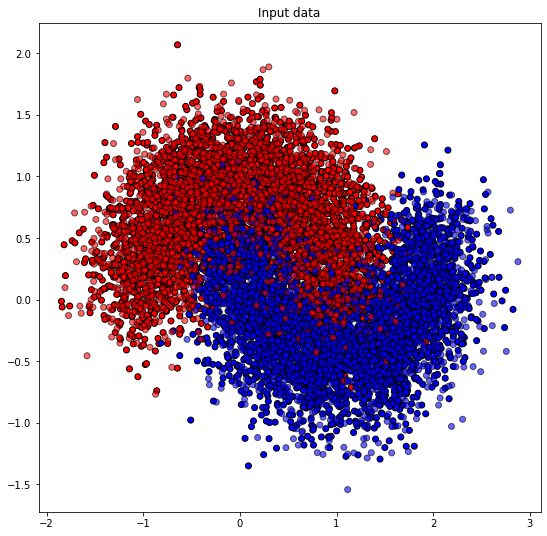

In [2]:
# X, y = make_classification(
#     n_samples = 10000, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
# )
# rng = np.random.RandomState(2)
# X += 2 * rng.uniform(size=X.shape)
# linearly_separable = (X, y)

figure = plt.figure(figsize=(9, 9))

# preprocess dataset, split into training and test part
X, y = make_moons(n_samples = 10000, noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax = plt.subplot(1, 0 + 1, 1)
ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
# Plot the testing points
ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
)


# make our data set

In [3]:
# y_moon indicates if the data will be in the first bucket or the second
X, y_moon = make_moons(n_samples = 10000, noise=0.3, random_state=1978)

s = np.random.binomial(1, 0.5, len(y_moon))

t_min = 0
t_boundary = 67
t_max = 100
t = np.zeros(len(y_moon))

for ii in range(0, len(y_moon)):
    if y_moon[ii] == 0:
        t[ii] = np.random.uniform(t_min, t_boundary)
    elif y_moon[ii] == 1:
        t[ii] = np.random.uniform(t_boundary, t_max)



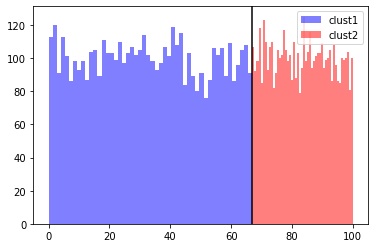

In [4]:
plt.hist(t[y_moon==0], bins=50, alpha = 0.5, color = "blue", label="clust1")
plt.hist(t[y_moon==1], bins=50, alpha = 0.5, color = "red", label="clust2")
plt.axvline(67, color="black")
plt.legend()
plt.show()

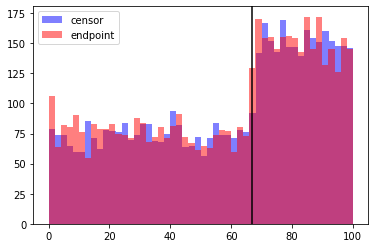

In [5]:
plt.hist(t[s==0], bins=50, alpha = 0.5, color = "blue", label="censor")
plt.hist(t[s==1], bins=50, alpha = 0.5, color = "red", label="endpoint")
plt.axvline(67, color="black")
plt.legend()
plt.show()

In [ ]:
X_train, X_test, \
t_train, t_test,\
s_train, s_test = train_test_split(
    X, t, s, test_size=0.2, random_state=1978
)

# multi modal?

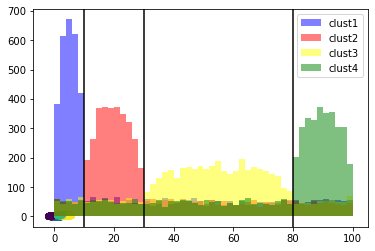

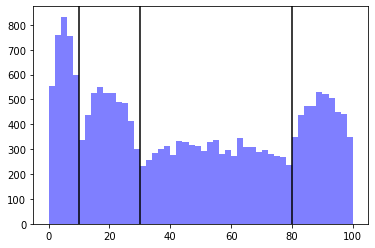

In [106]:
# preprocess dataset, split into training and test part
X, y = make_moons(n_samples = 10000, noise=0.3, random_state=0)
# make 2 more classes and shift covariates
X2, y2 = make_moons(n_samples = 10000, noise=0.3, random_state=0)
X2 = X2 + 3
y2 = y2 + 2

X = np.concatenate((X,X2))
y = np.concatenate((y, y2))

plt.scatter(X[:, 0], X[:, 1], c=y)


s = np.random.binomial(1, 0.5, len(y))

t_min = 0
t_boundaries = [10, 30, 80]
t_max = 100
t = np.zeros(len(y))

for ii in range(0, len(y)):
    if s[ii] == 1:
        t[ii] = np.random.uniform(t_min, t_max)
    else:
        if y[ii] == 0:
            t[ii] = (np.random.beta(1.5,1.5) * (t_boundaries[0] - t_min)) + t_min
        elif y[ii] == 1:
            t[ii] = (np.random.beta(1.5,1.5) * (t_boundaries[1] - t_boundaries[0])) + t_boundaries[0]
        elif y[ii] == 2:
            t[ii] = (np.random.beta(1.5,1.5) * (t_boundaries[2] - t_boundaries[1])) + t_boundaries[1]
        elif y[ii] == 3:
            t[ii] = (np.random.beta(1.5,1.5) * (t_max - t_boundaries[2])) + t_boundaries[2]

        
X_train, X_test, \
t_train, t_test,\
s_train, s_test = train_test_split(
    X, t, s, test_size=0.2, random_state=1978
)

plt.hist(t[y==0], bins=50, alpha = 0.5, color = "blue", label="clust1")
plt.hist(t[y==1], bins=50, alpha = 0.5, color = "red", label="clust2")
plt.hist(t[y==2], bins=50, alpha = 0.5, color = "yellow", label="clust3")
plt.hist(t[y==3], bins=50, alpha = 0.5, color = "green", label="clust4")

for bound in t_boundaries:
    plt.axvline(bound, color="black")

plt.legend()
plt.show()

plt.hist(t, bins=50, alpha = 0.5, color = "blue")

for bound in t_boundaries:
    plt.axvline(bound, color="black")

plt.show()

In [11]:
depth = 1
equal_spacings = [(i+1)/(2**(depth+1)) for i in range(0, 2**(depth+1) + -1)]
equal_spacings

[0.25, 0.5, 0.75]

In [12]:
import numpy as np
t = np.array([1, 19, 3, 34, 55, 4, 2, 96, 30, 54, 2, 34])

t_conv = (t - min(t)) / (max(t) - min(t))

quantile_spacings = np.linspace(0, 1, 2**(depth+1)+1)
quantile_spacings = np.quantile(t_conv, quantile_spacings)[1:-1]
quantile_spacings

array([0.01842105, 0.24736842, 0.4       ])